# Playground - Part II

🎯 **Goal**: Get a better understanding of ***Neural Network hyperparameters***

<hr>

👉 Open the [Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=3&seed=0.06711&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=false&regularizationRate_hide=false) again to learn more about Neural Networks. 

❗️ Keep in mind that as the algorithm is stochastic, the results may differ from one run to another. For this reason, do not hesitate to re-run the algorithms multiple times to analyse the behavior of your Neural Networks and draw your conclusions accordingly.

🕵🏻 Let's explore the different items we have seen during the lecture:
- **Batch Size**
- **Regularization**
- **Learning Rate**

## (1) The batch size

❓ **Initial Question** ❓ Select the `circle dataset` (Classification). 

* Build a model with: 
    * one hidden layer with 3 neurons,
    * a _learning rate_ equal to 0.03, 
    * and the _tanh_ activation function

* Do not add any noise (=0).

* Select a batch size of 30

***Look at the convergence of the algorithm. Does it seem slow or fast?***

Converges quickly

❓ **Question: What is happening with a batch size of 1** ❓ 

Now, run this neural network on the same dataset but... 

* with a batch-size of 1.
* Make sure to run it for at least 150 epochs. 

***What do you notice about the train and test loss? What is the reason of this instability?***

1. Your gradient estimation is very noisy. This may cause your model to either diverge or to converge at a non optimal minima.

2. Since you are using a small batch size, you are always suffering from sample bias. You are over-fitting the mini-batch distribution and not the actual distribution of the dataset. This means reduced accuracy.

3. Very popular techniques such as batch normalization that require and benefit from large batches will fail spectacularly. Trying to estimate mean and std with small batch size is a big no-no. This will cause havok on your network outputs to the point it might fail completely to work. I suggest you look at alternatives to batch normalization such as Group Normalization and Batch Kalman Normalization which are more robust to changes in batch size, or remove it completely. If you are going to do transfer learning you probably should keep the batch normalization layers frozen.

The issue is that a small batch size both helps and hurts convergence. Updating the weights based on a small batch will be more noisy. The noise can be good, helping by jerking out of local optima. However, the same noise and jerkiness will prevent the descent from fully converging to an optima at all.

It is a trade off between these factors, the best batch size will depend on the shape of the error manifold. Larger batch sizes are better on convex errors and smaller batch size are good on errors with lots of deeper local optima.

❓ **Question/Observation** ❓ 

Now, you can see the effect of the _batch_size_ by reading the values of the train loss and test loss: pause the iterations and run it step by step (iteration per iteration) using the `"Step"` button (at the right side of the play/stop button).

> <i>Answer here</i>

## 2. Regularization

❓ **Question about the lack of generalization** ❓ 

To once again observe the **lack of generalization**:
* Select the `"eXclusive OR"(XOR)` dataset, 
* with a noise of 50,
* Add a second hidden layer with again 8 neurons. 

***Try to fit your model once again... what do you expect?***

> <i>Add your comments here</i>

❗️ With a smaller batch size, your model will end up overfitting faster... ❗️

👉 Although, let's keep ***`batch size = 1`*** for the next question and try to understand how to prevent overfitting using the strategy of `regularization`.

❓ **Question about regularization** ❓ 

Can we ***regularize*** our network to ***avoid overfitting***? 

* Keep the batch size to 1,
* Add a `L2-regularization`,
* Increase the power of this L2-regularization until it smooths out the decision boundary! 
Notice how the test loss doesn't increase anymore with the epochs

> <i>Add your comments here</i>

❓ **Questions with the spiral dataset** ❓ 

<u>Configuration</u>:

* Select the `spiral dataset`,
* Remove regularization,
* Increase the `ratio of training to test data` to 80%. 

<u>Neural Network</u>: 3 hidden layers with:
* 8 neurons on the first layer, 
* 7 neurons on the second layer,
* 6 neurons on the third layer. 

<u>Experiment</u>:

* Run the algorithm with a batch size of 30,
* Make sure to run it for at least 1500 epochs,
* Then, compare it to the same run but with a batch size of 1. 

You can check what happens on the train loss and test loss step by step.

> <i>Add your comments here</i>

## (3) The learning rate

Go back to the <u>`circle dataset`</u>:
* with no noise,
* and a *ratio of training to test data* of 50%,
* Use a batch size of 20. 

Use a <u>neural network</u> with:
* one layer of 5 neurons,
* no regularization, 
* and the tanh activation function

❓ **Question about the learning rate** ❓ 

For each learning rate (from 0.0001 to 10), run the algorithm during 1000 epochs and report the values of the test loss in the list below. Then, plot the test loss with respect to the learning rates. 

❗️ <u>Warning</u> ❗️ When you change the learning rate, make sure to reinitialize the neural network (_circular arrow, left to the play/pause button_).

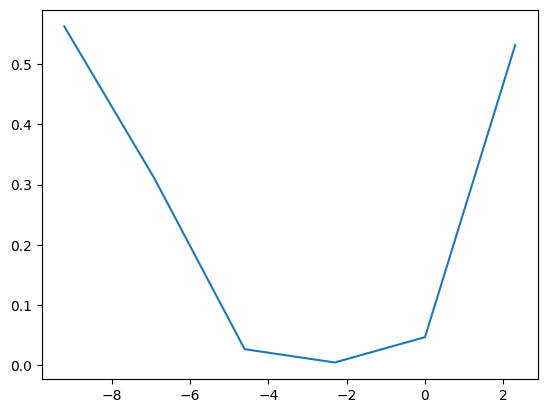

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]
test_loss = [0.562, 0.310, 0.027,  0.005, 0.047, 0.531]


plt.plot(np.log(learning_rates), test_loss)

In [8]:
np.log(10)

2.302585092994046

In [3]:
np.log(learning_rates)

array([-9.21034037, -6.90775528, -4.60517019, -2.30258509,  0.        ,
        2.30258509])

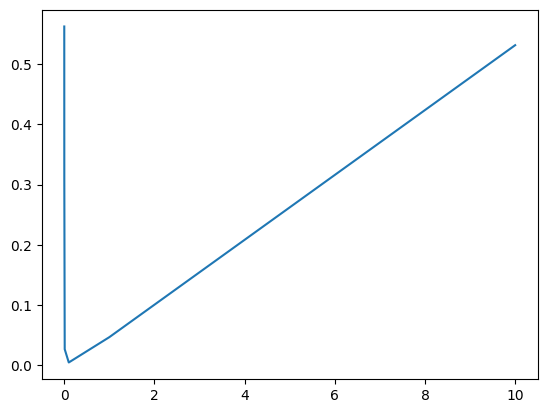

In [2]:
plt.plot(learning_rates, test_loss)

❗️ <u>Warning</u> ❗️ Too low and too high learning rates both lead to a high test loss... but not for the same reasons!

* A **low learning rate** helps a neural network converge in a similar fashion to a moderate learning rate but... way slower... i.e. more epochs would be needed!
* A **high learning rate** makes the algorithm diverge completely.
    - Try a learning rate $ \alpha = 10 $ with 400 epochs, you should see the loss vary. This corresponds to the fact that the algorithms converge to *different local minima*



🏁 Congratulations!

💾 Do not forget to `git add/commit/push` your notebook...

🚀 ... and move to the next challenge!